In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import zipfile
sns.set_theme(style="darkgrid")

In [3]:
zip_file_path = 'datasets/archive (2).zip'
extract_to = 'datasets/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [4]:
transaction_data = pd.read_csv(extract_to + "PS_20174392719_1491204439457_log.csv")
transaction_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
transaction_data.shape

(6362620, 11)

In [6]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
transaction_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
transaction_data['nameDest'].nunique()

2722362

In [9]:
transaction_data['nameOrig'].nunique()

6353307

In [10]:
transaction_data = transaction_data.drop(labels= ['nameOrig' , 'nameDest'], axis=1)
transaction_data.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2728975,212,CASH_OUT,65588.51,0.00,0.00,3538317.94,3603906.45,0,0
6233892,594,TRANSFER,643901.53,2044.00,0.00,0.00,643901.53,0,0
3518387,259,CASH_OUT,302434.85,0.00,0.00,2864147.82,3166582.67,0,0
9784,7,CASH_IN,173061.52,2248199.21,2421260.74,246208.54,73147.02,0,0
5386452,376,PAYMENT,32174.13,0.00,0.00,0.00,0.00,0,0


In [11]:
transaction_data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

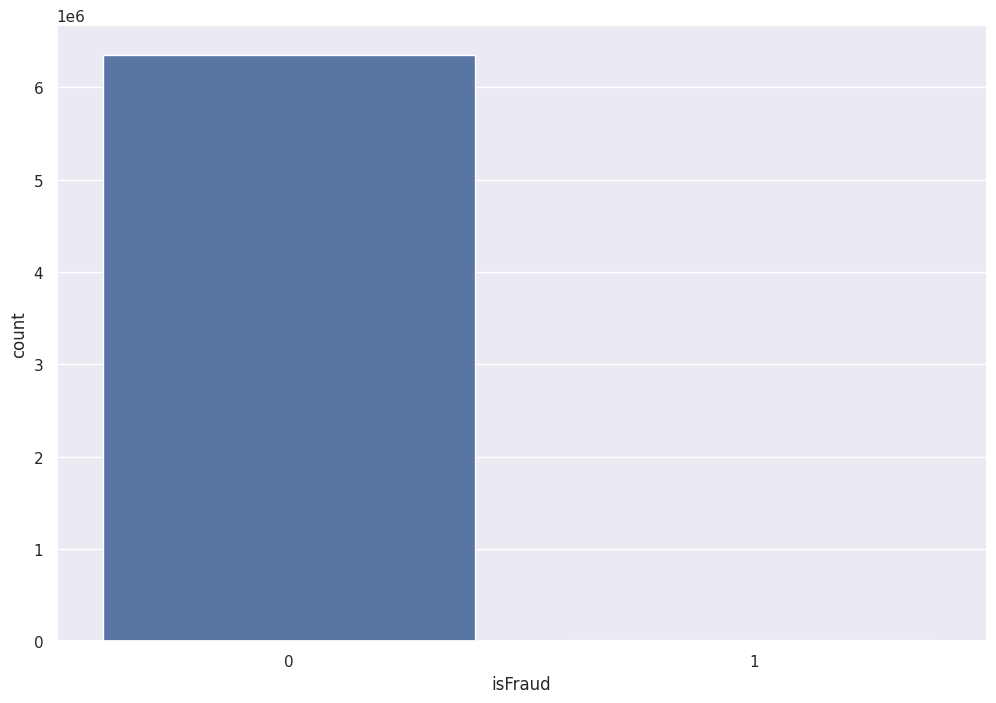

In [12]:
plt.figure(figsize= (12, 8))
sns.countplot(x='isFraud', data= transaction_data)

/home/cbc/data/mldetection/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

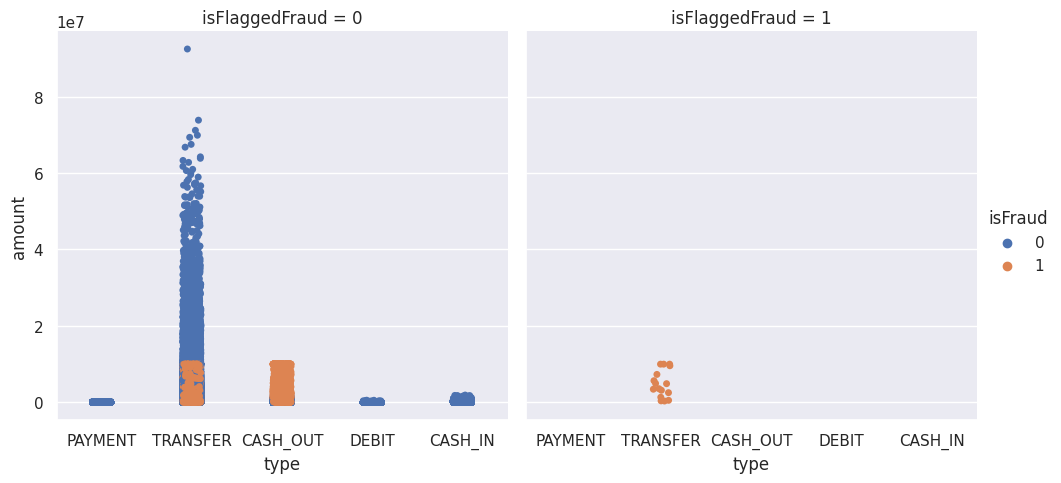

In [13]:
plt.figure(figsize=( 12, 8))

sns.catplot(x = 'type', y = 'amount', estimator = sum,
            hue = 'isFraud', col = 'isFlaggedFraud',
            data = transaction_data);